### Naive GNN application to the SA data set

### y - discrete inc (0, 1); x - other node features; edge index - the physical networks

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
# import geoplot
import pickle
import statsmodels.api as sm
import copy


In [4]:
import torch
from torch_geometric.data import Data


ModuleNotFoundError: No module named 'torch'

In [3]:
# read two datasets
edge_df = pd.read_pickle('../../data_process/edge_specific_df.pickle')
node_df = pd.read_pickle('../../data_process/node_specific_df.pickle')


### Preapre the data set

In [6]:
node_df.columns

Index(['SA2_MAIN16', 'SA2_5DIG16', 'SA2_NAME16', 'SA3_CODE16', 'SA3_NAME16',
       'SA4_CODE16', 'SA4_NAME16', 'GCC_CODE16', 'GCC_NAME16', 'STE_CODE16',
       'STE_NAME16', 'AREASQKM16', 'class_ART', 'class_BUS', 'class_COLL',
       'class_FREE', 'class_HWY', 'class_LOCL', 'class_SUBA', 'class_TRK2',
       'class_TRK4', 'class_UND', 'geometry', 'num_jobs_000_persons',
       'sa2_code16', 'median_income_per_job_aud_persons', 'origin_x',
       'unique_agents_origin_counts', 'sum_stay_duration_origin_counts',
       'total_stays_origin_counts', 'destination_x',
       'unique_agents_destination_counts',
       'sum_stay_duration_destination_counts',
       'total_stays_destination_counts', 'origin_y',
       'unique_agents_origin_entropy', 'sum_stay_duration_origin_entropy',
       'total_stays_origin_entropy', 'destination_y',
       'unique_agents_destination_entropy',
       'sum_stay_duration_destination_entropy',
       'total_stays_destination_entropy'],
      dtype='object')

In [53]:
node_df=node_df.sort_values('SA2_MAIN16')

,SA2_MAIN16,SA2_5DIG16,SA2_NAME16,SA3_CODE16,SA3_NAME16,SA4_CODE16,SA4_NAME16,GCC_CODE16,GCC_NAME16,STE_CODE16,...,total_stays_destination_counts,origin_y,unique_agents_origin_entropy,sum_stay_duration_origin_entropy,total_stays_origin_entropy,destination_y,unique_agents_destination_entropy,sum_stay_duration_destination_entropy,total_stays_destination_entropy,discrete_inc
0,401011001,41001,Adelaide,40101,Adelaide City,401,Adelaide - Central and Hills,4GADE,Greater Adelaide,4,...,6577944,401011001,3.987705,1.588336,2.324296,401011001,4.460324,3.949646,4.237396,0.0
1,401011002,41002,North Adelaide,40101,Adelaide City,401,Adelaide - Central and Hills,4GADE,Greater Adelaide,4,...,1123442,401011002,3.855433,1.944331,2.609353,401011002,4.391005,3.152188,3.975034,0.0
2,401021003,41003,Adelaide Hills,40102,Adelaide Hills,401,Adelaide - Central and Hills,4GADE,Greater Adelaide,4,...,304810,401021003,3.956555,1.266519,2.456366,401021003,4.007255,0.948900,2.042530,0.0
3,401021004,41004,Aldgate - Stirling,40102,Adelaide Hills,401,Adelaide - Central and Hills,4GADE,Greater Adelaide,4,...,922067,401021004,3.879316,1.355832,2.310259,401021004,3.942693,1.099284,2.075796,1.0
4,401021005,41005,Hahndorf - Echunga,40102,Adelaide Hills,401,Adelaide - Central and Hills,4GADE,Greater Adelaide,4,...,281143,401021005,3.732677,1.404100,2.330624,401021005,4.017761,1.654530,2.549629,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,404031105,41105,Fulham,40403,West Torrens,404,Adelaide - West,4GADE,Greater Adelaide,4,...,121431,404031105,3.607086,1.765320,2.501771,404031105,3.689014,1.975506,2.784143,0.0
99,404031106,41106,Lockleys,40403,West Torrens,404,Adelaide - West,4GADE,Greater Adelaide,4,...,697096,404031106,3.813245,1.737626,2.658701,404031106,4.044919,1.416921,2.608267,0.0
100,404031107,41107,Plympton,40403,West Torrens,404,Adelaide - West,4GADE,Greater Adelaide,4,...,1527065,404031107,3.897496,1.747409,2.601546,404031107,4.083340,1.695853,2.732940,0.0
101,404031108,41108,Richmond (SA),40403,West Torrens,404,Adelaide - West,4GADE,Greater Adelaide,4,...,1549687,404031108,3.944291,1.692916,2.532070,404031108,4.279049,2.308701,3.390496,0.0


In [27]:
# y
from sklearn.preprocessing import KBinsDiscretizer
est = KBinsDiscretizer(n_bins=2, encode='ordinal', strategy='quantile')
discrete_inc = est.fit_transform(node_df['median_income_per_job_aud_persons'].values[:, np.newaxis])
node_df['discrete_inc'] = discrete_inc # this is y.
y = copy.copy(discrete_inc)
y_torch = torch.LongTensor(discrete_inc).squeeze()
y_torch

tensor([0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
        1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
        1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0,
        0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
        0, 0, 0, 0, 0, 0, 1])

In [126]:
# X
X = node_df[['num_jobs_000_persons', 'sum_stay_duration_origin_counts', 'sum_stay_duration_destination_counts']].values
from sklearn.preprocessing import normalize
X = normalize(X, norm='l2', axis=0)
X_torch = torch.FloatTensor(X)
X_torch 

tensor([[0.1399, 0.1153, 0.3923],
        [0.0543, 0.0536, 0.0729],
        [0.0535, 0.0463, 0.0407],
        [0.1409, 0.1176, 0.1044],
        [0.0338, 0.0296, 0.0307],
        [0.0687, 0.0592, 0.0553],
        [0.1270, 0.1148, 0.1110],
        [0.0502, 0.0375, 0.0327],
        [0.0385, 0.0335, 0.0276],
        [0.0414, 0.0364, 0.0331],
        [0.1391, 0.1358, 0.1108],
        [0.0731, 0.0663, 0.0537],
        [0.1231, 0.1161, 0.1312],
        [0.0725, 0.0675, 0.0533],
        [0.1332, 0.1450, 0.1272],
        [0.1509, 0.1590, 0.1360],
        [0.0896, 0.0807, 0.0854],
        [0.0901, 0.0934, 0.0954],
        [0.1088, 0.0957, 0.0783],
        [0.0511, 0.0434, 0.0247],
        [0.1167, 0.1092, 0.1136],
        [0.0566, 0.0485, 0.0451],
        [0.1460, 0.1310, 0.1177],
        [0.1626, 0.1504, 0.1316],
        [0.0690, 0.0598, 0.0543],
        [0.1335, 0.1431, 0.1364],
        [0.0419, 0.0349, 0.0283],
        [0.1275, 0.1239, 0.0864],
        [0.0954, 0.1131, 0.1085],
        [0.043

In [127]:
# Base line regression.
# X = sm.add_constant(X)
mod = sm.Logit(y, X)
res = mod.fit()
# print(res.summary())

# mod.params()
# mod.predict(res.params, exo)

# prediction & confusion matrix
print(res.pred_table()) 
print("Accuracy is {:5f}".format((28+38)/(28+23+14+38))) # accuracy 0.64077


Optimization terminated successfully.
         Current function value: 0.590144
         Iterations 7
[[31. 20.]
 [16. 36.]]
Accuracy is 0.640777


<AxesSubplot:>

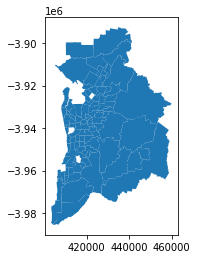

In [54]:
# edge index
sa2_adelaide = gpd.read_file('../data_process/shapefiles/sa2_adelaide.shp')
sa2_adelaide_proj = sa2_adelaide.to_crs("epsg:3112")
sa2_adelaide_proj['centroids']=sa2_adelaide_proj.centroid
shared_idx = sa2_adelaide_proj.SA2_MAIN16.loc[sa2_adelaide_proj.SA2_MAIN16.isin(node_df.SA2_MAIN16.values)].values
sa2_adelaide_proj = sa2_adelaide_proj.loc[sa2_adelaide_proj.SA2_MAIN16.isin(shared_idx), :].reset_index(drop=True) 
# node_idx = list(node_df.index)
# node_idx
sa2_adelaide_proj=sa2_adelaide_proj.sort_values('SA2_MAIN16')
sa2_adelaide_proj.plot() # note several SA2s are removed. Wait, why? Ah...some limnitation from the flow data side. 

In [55]:
sa2_adelaide_proj

,SA2_MAIN16,SA2_5DIG16,SA2_NAME16,SA3_CODE16,SA3_NAME16,SA4_CODE16,SA4_NAME16,GCC_CODE16,GCC_NAME16,STE_CODE16,STE_NAME16,AREASQKM16,geometry,centroids
0,401011001,41001,Adelaide,40101,Adelaide City,401,Adelaide - Central and Hills,4GADE,Greater Adelaide,4,South Australia,10.4824,"POLYGON ((417263.891 -3939518.653, 417262.345 ...",POINT (419063.221 -3939397.800)
1,401011002,41002,North Adelaide,40101,Adelaide City,401,Adelaide - Central and Hills,4GADE,Greater Adelaide,4,South Australia,5.0909,"POLYGON ((417476.199 -3936647.849, 417544.905 ...",POINT (418661.427 -3937155.968)
2,401021003,41003,Adelaide Hills,40102,Adelaide Hills,401,Adelaide - Central and Hills,4GADE,Greater Adelaide,4,South Australia,364.4390,"POLYGON ((433666.133 -3928044.498, 433628.032 ...",POINT (445193.899 -3927296.237)
3,401021004,41004,Aldgate - Stirling,40102,Adelaide Hills,401,Adelaide - Central and Hills,4GADE,Greater Adelaide,4,South Australia,117.2141,"POLYGON ((427353.316 -3946292.628, 427421.744 ...",POINT (429990.745 -3951575.711)
4,401021005,41005,Hahndorf - Echunga,40102,Adelaide Hills,401,Adelaide - Central and Hills,4GADE,Greater Adelaide,4,South Australia,110.1516,"POLYGON ((435785.372 -3950672.079, 435799.037 ...",POINT (434391.684 -3957940.977)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,404031105,41105,Fulham,40403,West Torrens,404,Adelaide - West,4GADE,Greater Adelaide,4,South Australia,1.3212,"POLYGON ((410502.489 -3938804.420, 410496.375 ...",POINT (411149.918 -3938979.008)
99,404031106,41106,Lockleys,40403,West Torrens,404,Adelaide - West,4GADE,Greater Adelaide,4,South Australia,5.7020,"POLYGON ((411842.413 -3938239.458, 411857.841 ...",POINT (413367.138 -3938842.518)
100,404031107,41107,Plympton,40403,West Torrens,404,Adelaide - West,4GADE,Greater Adelaide,4,South Australia,10.6969,"POLYGON ((413778.862 -3941759.801, 413777.655 ...",POINT (414375.480 -3942463.664)
101,404031108,41108,Richmond (SA),40403,West Torrens,404,Adelaide - West,4GADE,Greater Adelaide,4,South Australia,8.9253,"POLYGON ((414829.341 -3937727.856, 414828.056 ...",POINT (415914.735 -3939208.012)


In [57]:
from pysal.lib import weights

adelaide_queen=weights.contiguity.Queen.from_dataframe(sa2_adelaide_proj)
print(adelaide_queen.n)
print(adelaide_queen.neighbors)

103
{0: [1, 100, 101, 12, 16, 18, 21, 22, 23, 89], 1: [0, 18, 20, 101, 21, 89], 2: [32, 5, 7, 9, 47, 49, 52, 53], 3: [65, 4, 5, 73, 11, 9, 63], 4: [3, 5, 6, 7, 73], 5: [2, 3, 4, 6, 7, 8, 9], 6: [8, 4, 5, 7], 7: [2, 4, 5, 6, 8, 73], 8: [5, 6, 7], 9: [2, 3, 5, 10, 11, 13, 15, 49], 10: [16, 17, 18, 9, 11, 12, 15], 11: [3, 67, 23, 9, 10, 12, 63], 12: [0, 16, 23, 10, 11], 13: [49, 15, 9, 14], 14: [49, 17, 37, 13, 15], 15: [17, 9, 10, 13, 14], 16: [0, 17, 18, 10, 12], 17: [16, 18, 37, 10, 14, 15], 18: [0, 1, 16, 17, 37, 21, 10], 19: [37, 35, 20, 21], 20: [1, 97, 35, 19, 21, 89], 21: [0, 1, 18, 19, 20, 37], 22: [0, 66, 67, 100, 101, 23, 56], 23: [0, 67, 22, 11, 12], 24: [25, 26, 31], 25: [32, 24, 27, 31], 26: [24, 34, 31], 27: [32, 33, 25, 30, 31], 28: [33, 34, 44, 29, 31], 29: [33, 42, 43, 44, 28, 30], 30: [32, 33, 27, 43, 29], 31: [33, 34, 24, 25, 26, 27, 28], 32: [48, 2, 27, 25, 43, 30, 47], 33: [27, 28, 29, 30, 31], 34: [41, 26, 28, 44, 31], 35: [97, 19, 36, 37, 38, 20, 46], 36: [50, 35, 

In [66]:
# edge idx
edge_list = []
for source_node in adelaide_queen.neighbors:
    for target_node in adelaide_queen.neighbors[source_node]:
        edge_list.append([source_node, target_node])

edge_index = np.array(edge_list).transpose()
edge_index = torch.LongTensor(edge_index)
edge_index


tensor([[  0,   0,   0,  ..., 102, 102, 102],
        [  1, 100, 101,  ...,  98,  99,  55]])

In [68]:
# create the data
data = Data(x=X_torch, y=y_torch, edge_index = edge_index)
data

Data(edge_index=[2, 550], x=[103, 3], y=[103])

In [82]:
# add masks
train_mask = np.random.choice([True, False], size = 103, p = [0.8, 0.2]) # 80% training and 20% testing.
test_mask = np.logical_not(train_mask)

data.train_mask = torch.BoolTensor(train_mask)
data.test_mask = torch.BoolTensor(test_mask)
data

Data(edge_index=[2, 550], test_mask=[103], train_mask=[103], x=[103, 3], y=[103])

In [105]:
print(data.num_node_features)
print(data.num_classes)

3


AttributeError: 'Data' object has no attribute 'num_classes'

# GNN regression

In [134]:
import torch
import torch.nn.functional as F
from torch_geometric.nn import GCNConv

In [145]:
# a naive GNN
class Net(torch.nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = GCNConv(3, 15)
        self.conv2 = GCNConv(15, 2)
        
    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = self.conv2(x, edge_index)

        return F.log_softmax(x, dim = 1)
        

In [146]:
# 
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
model = Net().to(device)
data = data.to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=5e-4)


In [147]:
# train
model.train()
for epoch in range(200):
    optimizer.zero_grad()
    out = model(data)
    loss = F.nll_loss(out[data.train_mask], data.y[data.train_mask])
    loss.backward()
    optimizer.step()
    
    # evaluate 
    if epoch%20 == 0:
        _, pred = model(data).max(dim=1)
        train_correct = int(pred[data.train_mask].eq(data.y[data.train_mask]).sum().item())
        train_acc = train_correct / int(data.train_mask.sum())
        test_correct = int(pred[data.test_mask].eq(data.y[data.test_mask]).sum().item())
        test_acc = test_correct / int(data.test_mask.sum())
        print('Epoch: {}, Training Accuracy: {:.4f}'.format(epoch, train_acc))
        print('Epoch: {}, Testing Accuracy: {:.4f}'.format(epoch, test_acc))


Epoch: 0, Training Accuracy: 0.5526
Epoch: 0, Testing Accuracy: 0.3704
Epoch: 20, Training Accuracy: 0.5526
Epoch: 20, Testing Accuracy: 0.3704
Epoch: 40, Training Accuracy: 0.7105
Epoch: 40, Testing Accuracy: 0.4074
Epoch: 60, Training Accuracy: 0.7368
Epoch: 60, Testing Accuracy: 0.5185
Epoch: 80, Training Accuracy: 0.6974
Epoch: 80, Testing Accuracy: 0.5556
Epoch: 100, Training Accuracy: 0.6842
Epoch: 100, Testing Accuracy: 0.5556
Epoch: 120, Training Accuracy: 0.6842
Epoch: 120, Testing Accuracy: 0.5556
Epoch: 140, Training Accuracy: 0.6711
Epoch: 140, Testing Accuracy: 0.5556
Epoch: 160, Training Accuracy: 0.6842
Epoch: 160, Testing Accuracy: 0.5556
Epoch: 180, Training Accuracy: 0.6842
Epoch: 180, Testing Accuracy: 0.5556


In [150]:
data.y

tensor([0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
        1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
        1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0,
        0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
        0, 0, 0, 0, 0, 0, 1], device='cuda:0')

In [151]:
pred

tensor([0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1,
        1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1,
        0, 0, 1, 1, 0, 0, 1], device='cuda:0')

In [123]:
# eval
model.eval()

_, pred = model(data).max(dim=1)
train_correct = int(pred[data.train_mask].eq(data.y[data.train_mask]).sum().item())
train_acc = train_correct / int(data.train_mask.sum())
test_correct = int(pred[data.test_mask].eq(data.y[data.test_mask]).sum().item())
test_acc = test_correct / int(data.test_mask.sum())

print('Training Accuracy: {:.4f}'.format(train_acc))
print('Testing Accuracy: {:.4f}'.format(test_acc))


Training Accuracy: 0.6842
Testing Accuracy: 0.5556


In [124]:
int(data.test_mask.sum())

27

In [125]:
test_correct

15

In [128]:
model(data)

tensor([[-0.0716, -2.6728],
        [-0.2621, -1.4671],
        [-1.0479, -0.4318],
        [-1.2539, -0.3360],
        [-1.6039, -0.2245],
        [-1.4901, -0.2553],
        [-1.6666, -0.2093],
        [-1.5430, -0.2405],
        [-1.7263, -0.1960],
        [-0.9196, -0.5086],
        [-0.3937, -1.1225],
        [-0.5738, -0.8288],
        [-0.3133, -1.3132],
        [-0.9793, -0.4709],
        [-0.7395, -0.6489],
        [-0.8018, -0.5951],
        [-0.3361, -1.2537],
        [-0.4536, -1.0088],
        [-0.2777, -1.4169],
        [-0.7075, -0.6790],
        [-0.3937, -1.1225],
        [-0.3957, -1.1185],
        [-0.1939, -1.7358],
        [-0.2986, -1.3543],
        [-1.4356, -0.2718],
        [-1.1505, -0.3805],
        [-1.4249, -0.2751],
        [-1.0071, -0.4546],
        [-0.8089, -0.5895],
        [-0.7018, -0.6845],
        [-0.9097, -0.5152],
        [-1.0184, -0.4481],
        [-1.0935, -0.4081],
        [-0.8544, -0.5543],
        [-0.9921, -0.4633],
        [-0.4229, -1